In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_crash = pd.read_csv('/home/smr1020/bumper/CRASH_2019_STATEWIDE.csv')
df_flag = pd.read_csv('/home/smr1020/bumper/FLAG_2019_STATEWIDE.csv')
df_person = pd.read_csv('/home/smr1020/bumper/PERSON_2019_STATEWIDE.csv')

In [23]:
CRN = df_flag[
        (df_flag['SNOW_SLUSH_ROAD']==1) 
        | (df_flag['ICY_ROAD']==1) 
        | (df_flag['WET_ROAD']==1) 
        & (df_flag['ALCOHOL_RELATED']==0)
        & (df_flag['AGGRESSIVE_DRIVING']==0)
        & (df_flag['DRUG_RELATED']==0)
        & (df_flag['IMPAIRED_DRIVER']==0)
        & (df_flag['SUDDEN_DEER']==0)
        & (df_flag['FATIGUE_ASLEEP']==0)
       ]['CRN']

CRN_rain = df_flag[
        (df_flag['WET_ROAD']==1) 
        & (df_flag['ALCOHOL_RELATED']==0)
        & (df_flag['AGGRESSIVE_DRIVING']==0)
        & (df_flag['DRUG_RELATED']==0)
        & (df_flag['IMPAIRED_DRIVER']==0)
        & (df_flag['SUDDEN_DEER']==0)
        & (df_flag['FATIGUE_ASLEEP']==0)
       ]['CRN']

CRN_snow = df_flag[
        (df_flag['SNOW_SLUSH_ROAD']==1) 
        & (df_flag['ALCOHOL_RELATED']==0)
        & (df_flag['AGGRESSIVE_DRIVING']==0)
        & (df_flag['DRUG_RELATED']==0)
        & (df_flag['IMPAIRED_DRIVER']==0)
        & (df_flag['SUDDEN_DEER']==0)
        & (df_flag['FATIGUE_ASLEEP']==0)
       ]['CRN']

CRN_icy = df_flag[
        (df_flag['ICY_ROAD']==1) 
        & (df_flag['ALCOHOL_RELATED']==0)
        & (df_flag['AGGRESSIVE_DRIVING']==0)
        & (df_flag['DRUG_RELATED']==0)
        & (df_flag['IMPAIRED_DRIVER']==0)
        & (df_flag['SUDDEN_DEER']==0)
        & (df_flag['FATIGUE_ASLEEP']==0)
       ]['CRN']

In [36]:
def stratify_counts(df,CRN,CRN_rain,CRN_snow,CRN_icy):
    weather = df[df['CRN'].isin(CRN.values)].groupby('DVR_LIC_STATE').count().max(axis=1)
    rain = df[df['CRN'].isin(CRN_rain.values)].groupby('DVR_LIC_STATE').count().max(axis=1)
    snow = df[df['CRN'].isin(CRN_snow.values)].groupby('DVR_LIC_STATE').count().max(axis=1)
    icy = df[df['CRN'].isin(CRN_icy.values)].groupby('DVR_LIC_STATE').count().max(axis=1)
    
    return weather,rain,snow,icy

def stratify_means(df,CRN,CRN_rain,CRN_snow,CRN_icy):
    weather = df[df['CRN'].isin(CRN.values)].groupby('DVR_LIC_STATE').mean()
    rain = df[df['CRN'].isin(CRN_rain.values)].groupby('DVR_LIC_STATE').mean()
    snow = df[df['CRN'].isin(CRN_snow.values)].groupby('DVR_LIC_STATE').mean()
    icy = df[df['CRN'].isin(CRN_icy.values)].groupby('DVR_LIC_STATE').mean()
    
    return weather,rain,snow,icy

In [37]:
df_person = df_person.drop_duplicates('CRN')

In [38]:
states = df_person[df_person['CRN'].isin(CRN.values)].groupby('DVR_LIC_STATE').count().max(axis=1).index

In [39]:
# person_means = df_person[df_person['CRN'].isin(CRN.values)].groupby('DVR_LIC_STATE').mean()

person_means,person_means_rain,person_means_snow,person_means_icy = stratify_means(df_person,CRN,CRN_rain,CRN_snow,CRN_icy)

In [41]:
crashes_weather,crashes_rain,crashes_snow,crashes_icy = stratify_counts(df_person,CRN,CRN_rain,CRN_snow,CRN_icy)

In [42]:
all_crashes = df_person[df_person['CRN'].isin(df_person['CRN'].unique())].groupby('DVR_LIC_STATE').count().max(axis=1)

In [45]:
crashes_rain.sum()


5764

In [46]:
crashes_snow.sum()

1472

In [47]:
crashes_icy.sum()

1593

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

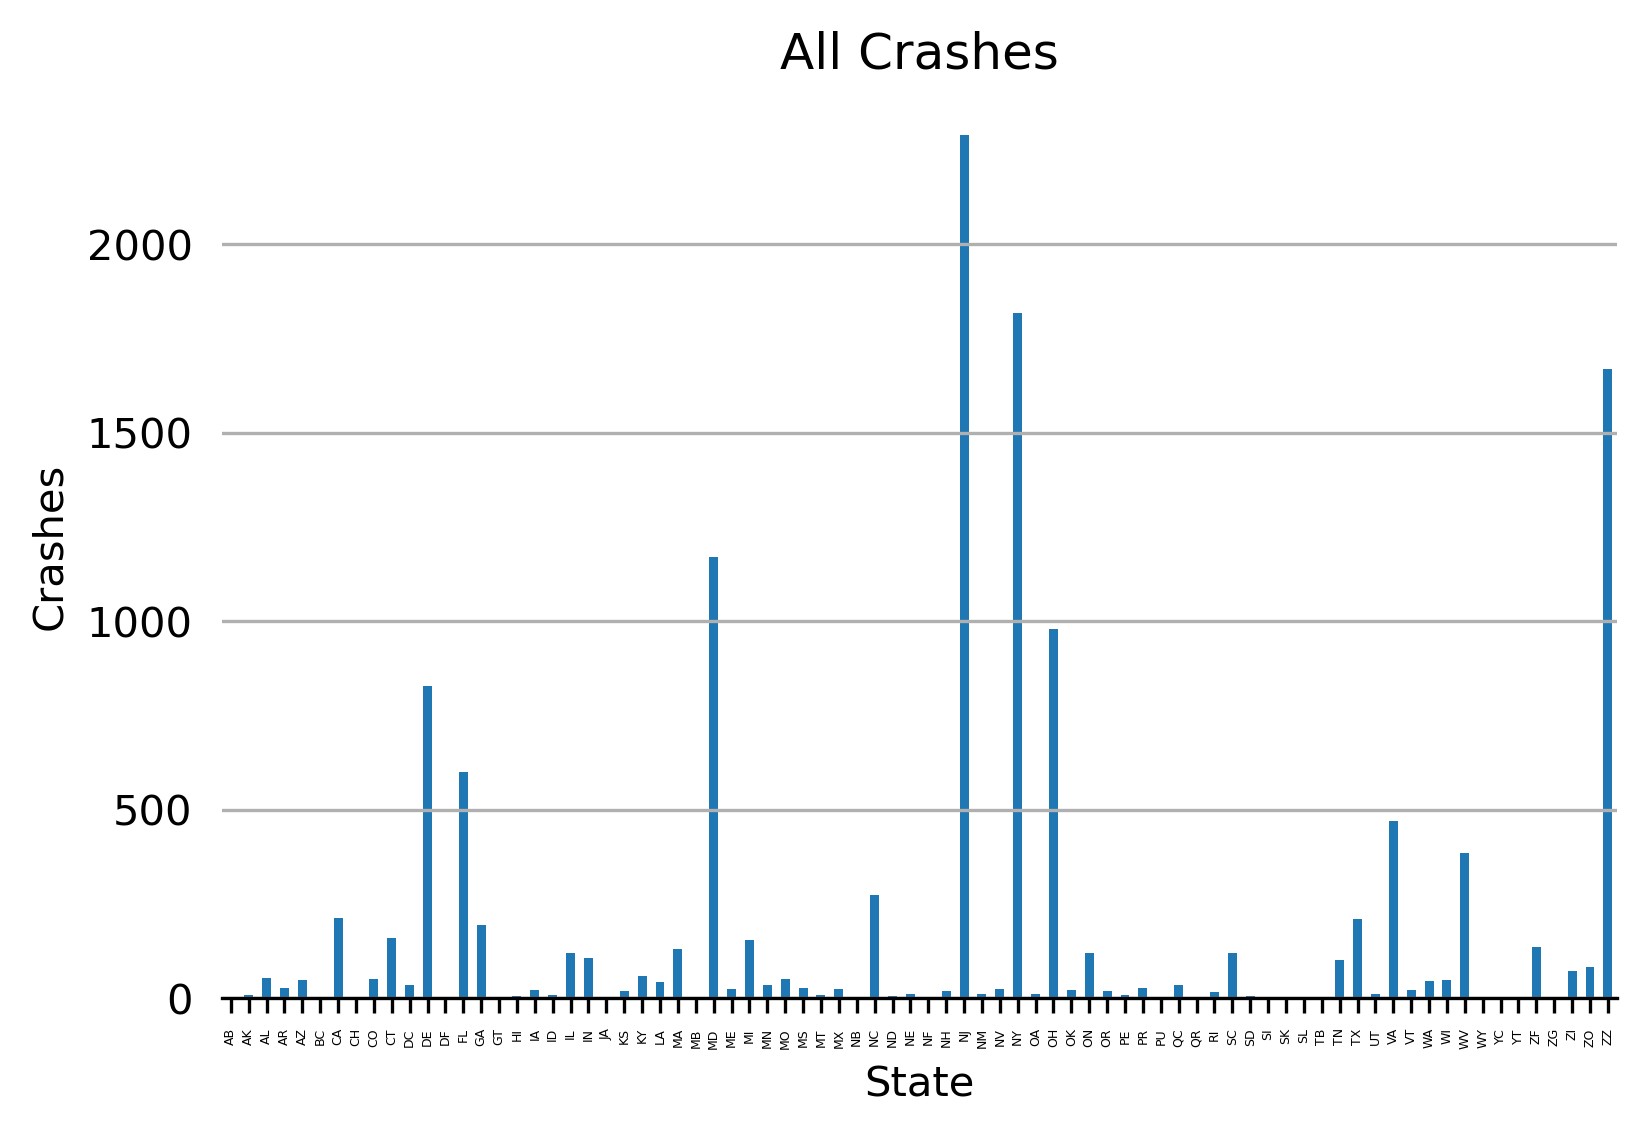

In [43]:
plt.figure(dpi=300)
plt.title('All Crashes')
all_crashes[all_crashes.index != 'PA'].plot.bar()
plt.grid(axis='y')
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',left=False)
plt.xlabel('State')
plt.ylabel('Crashes')
plt.xticks(fontsize=3)
# plt.axhline(50,color='k')

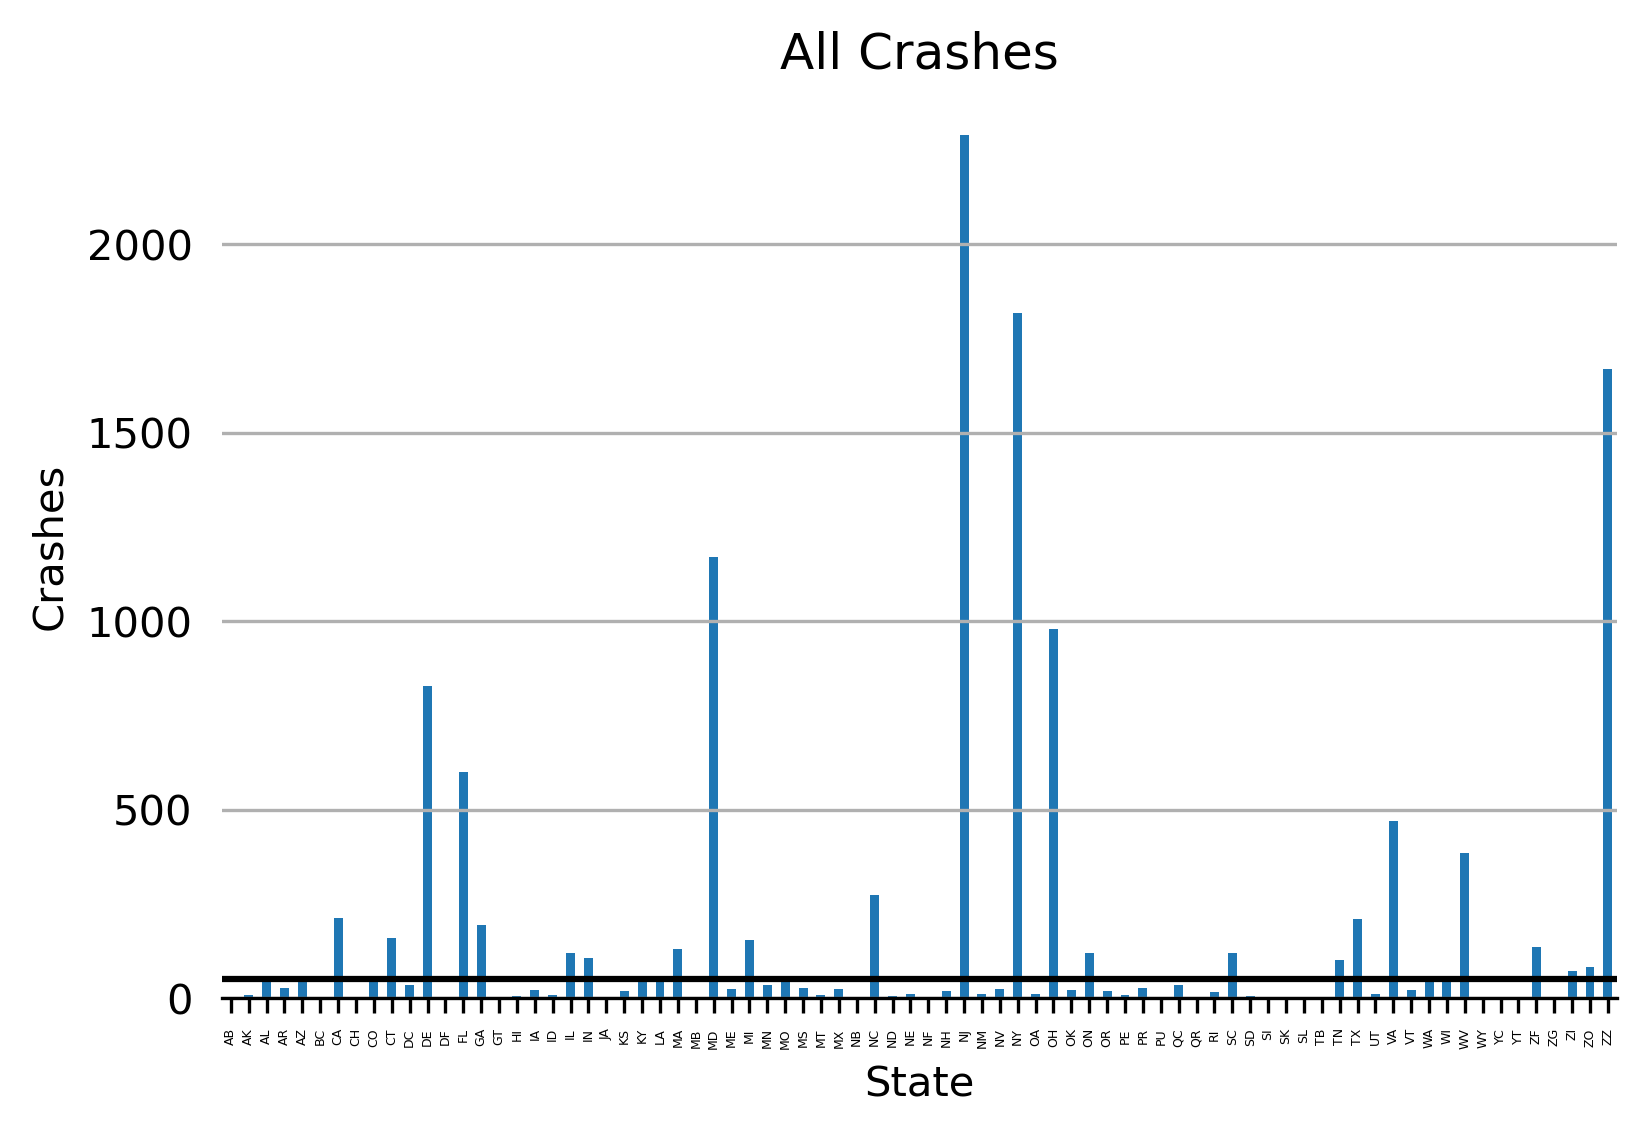

In [10]:
plt.figure(dpi=300)
plt.title('All Crashes')
all_crashes[all_crashes.index != 'PA'].plot.bar()
plt.grid(axis='y')
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',left=False)
plt.xlabel('State')
plt.ylabel('Crashes')
plt.xticks(fontsize=3)
plt.axhline(50,color='k')

In [11]:
gt_50_crashes = all_crashes[all_crashes>50].index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

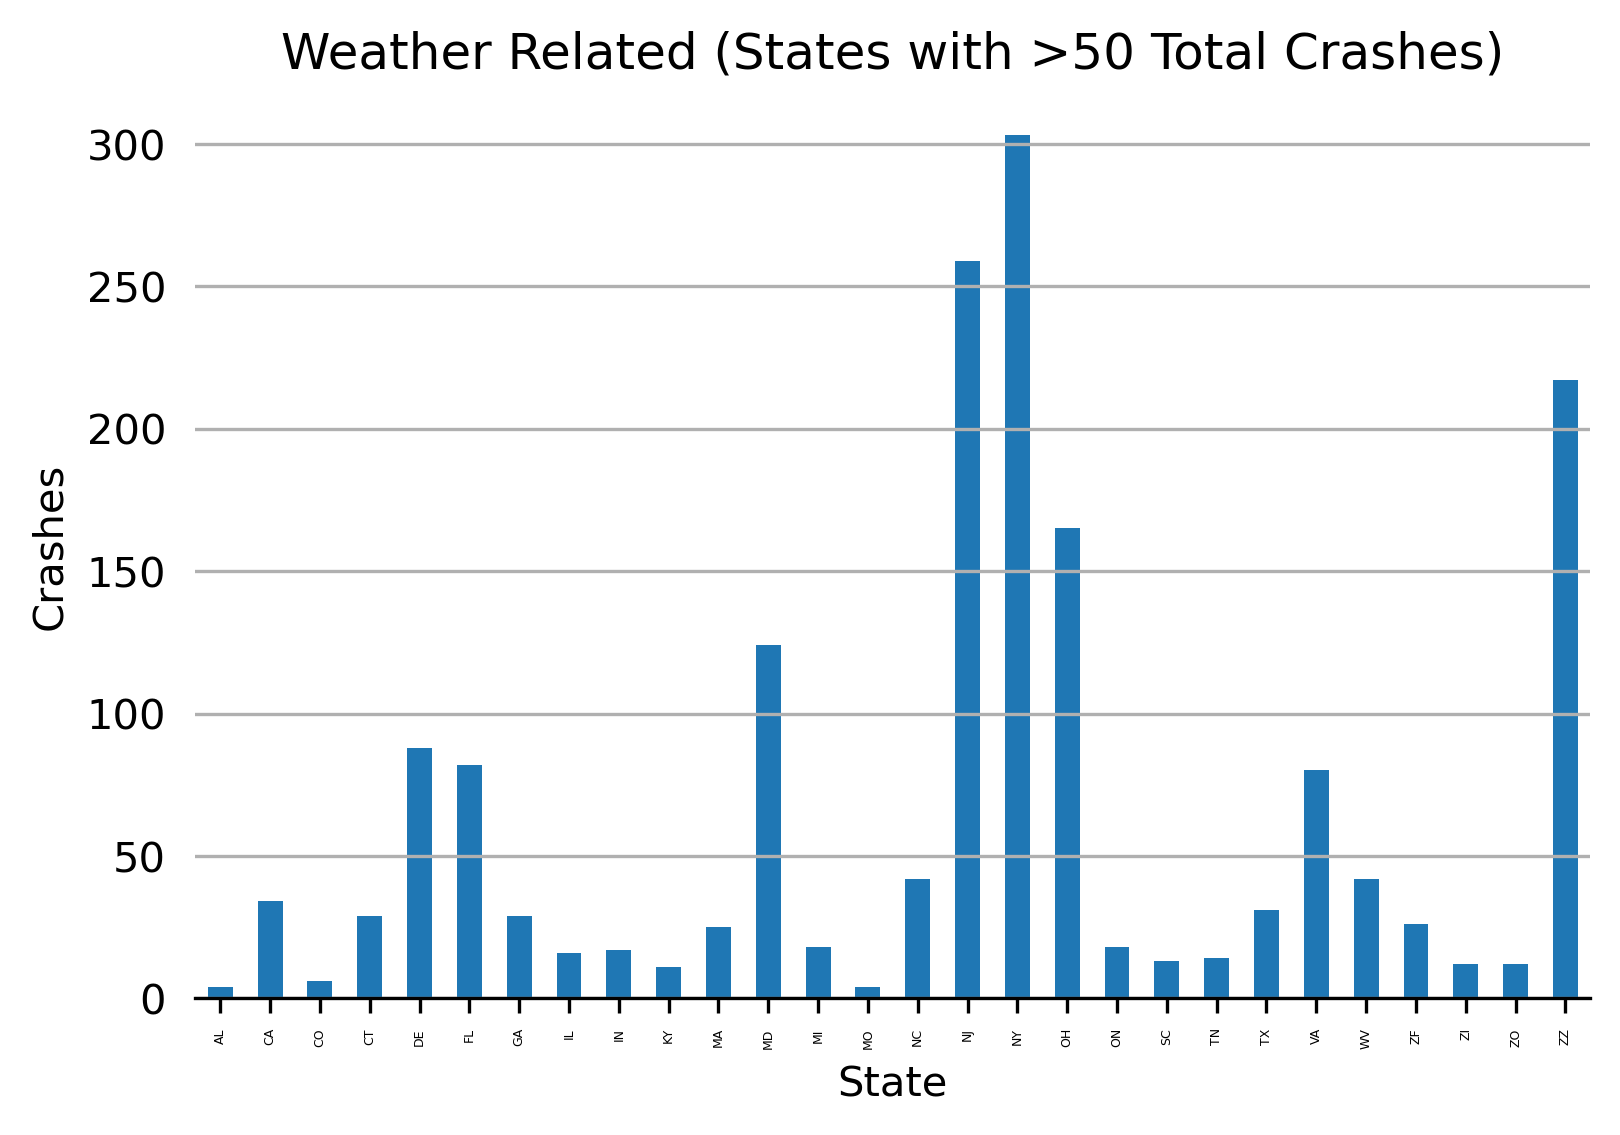

In [12]:
plt.figure(dpi=300)
plt.title('Weather Related (States with >50 Total Crashes)')
crashes_weather[(crashes_weather.index != 'PA') & crashes_weather.index.isin(gt_50_crashes)].plot.bar()
plt.grid(axis='y')
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',left=False)
plt.xlabel('State')
plt.ylabel('Crashes')
plt.xticks(fontsize=3)

In [13]:
normalized = crashes_weather/all_crashes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

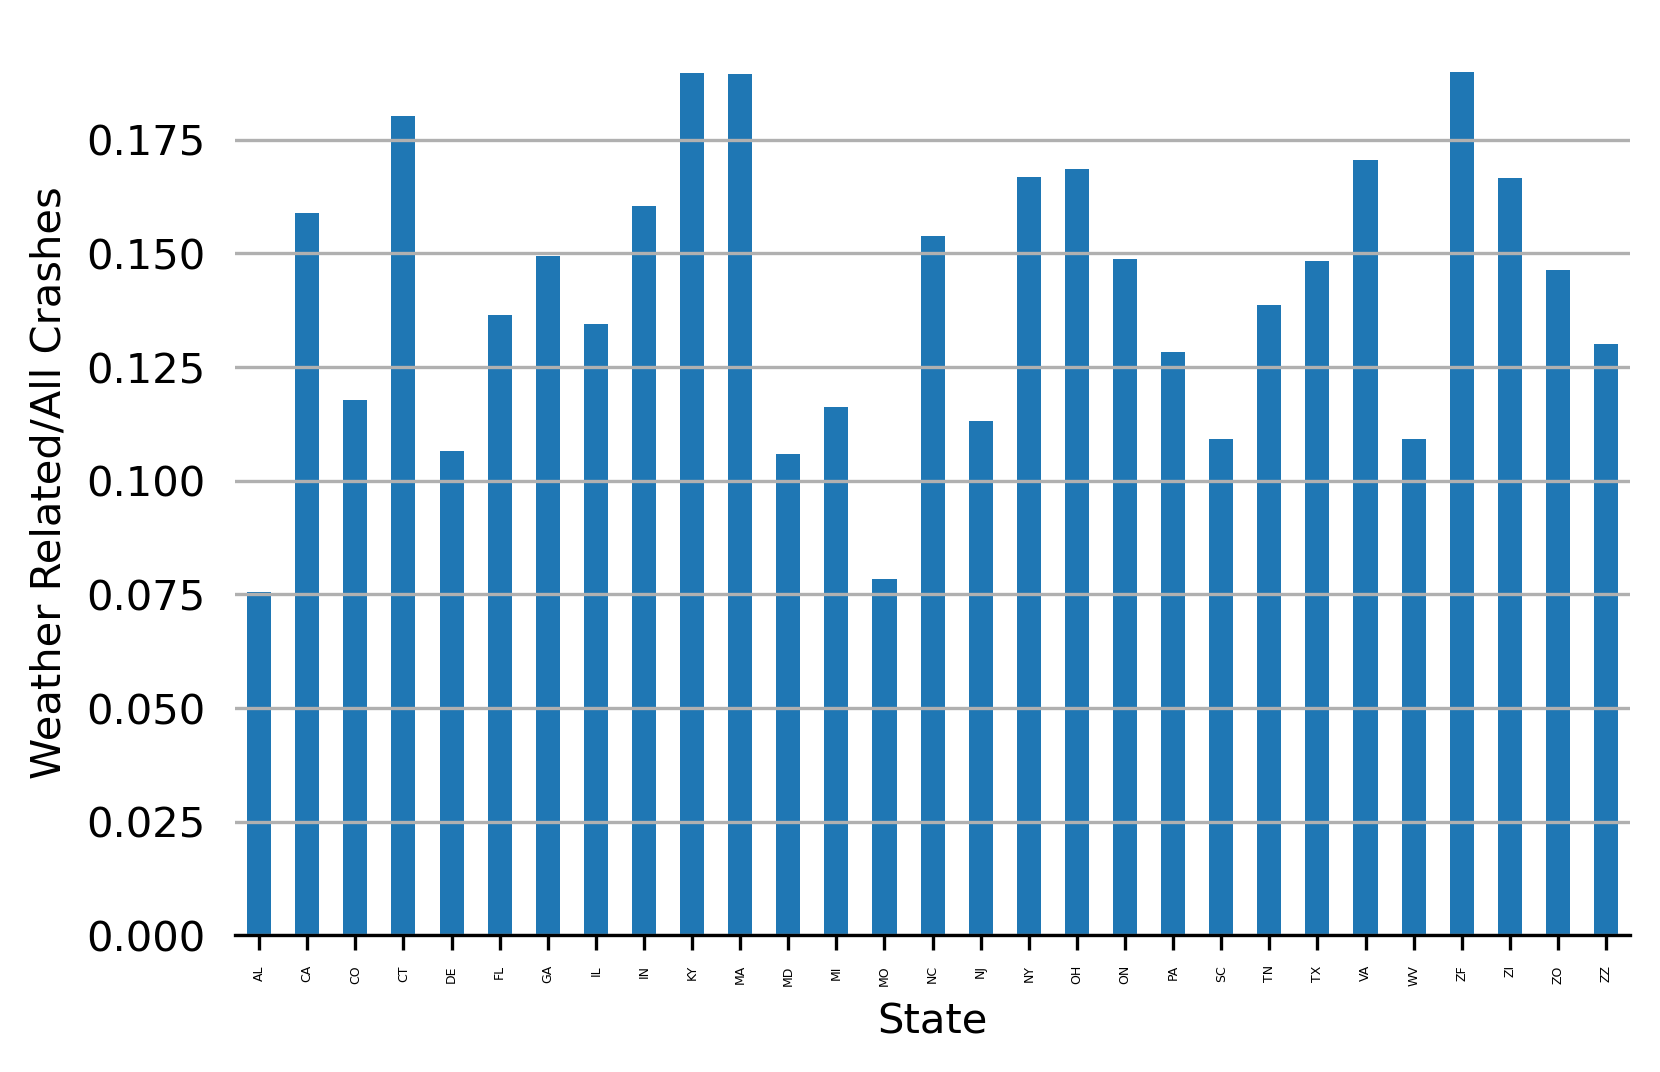

In [14]:
plt.figure(dpi=300)
normalized[normalized.index.isin(gt_50_crashes)].plot.bar()
plt.grid(axis='y')
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',left=False)
plt.xlabel('State')
plt.ylabel('Weather Related/All Crashes')
plt.xticks(fontsize=3)

In [15]:
filtered = normalized[(normalized.index != 'PA') & normalized.index.isin(gt_50_crashes)]

In [16]:
temperature = pd.read_csv('./state_temp.txt',sep='\t')

In [17]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

temperature['State'] = list(us_state_abbrev.values())

In [18]:
temperature = temperature.set_index('State')

In [19]:
temperature['Crash Rate'] = filtered
temperature['Age'] = person_means['AGE']

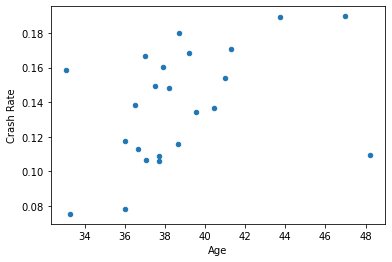

In [20]:
temperature.plot.scatter('Age','Crash Rate')

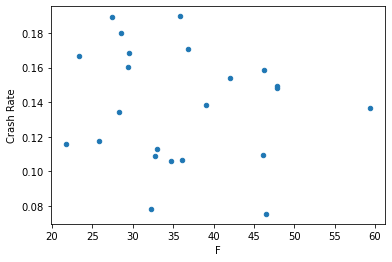

In [21]:
temperature.plot.scatter('F','Crash Rate')

In [22]:
temperature.corr('pearson')

,F,C,Rank,Crash Rate,Age
F,1.000000,0.771749,-0.960303,-0.129200,-0.177685
C,0.771749,1.000000,-0.801558,-0.129822,0.138533
Rank,-0.960303,-0.801558,1.000000,0.155517,0.052992
Crash Rate,-0.129200,-0.129822,0.155517,1.000000,0.397939
Age,-0.177685,0.138533,0.052992,0.397939,1.000000
